In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)


In [53]:
df = pd.read_csv(r"C:\Users\asus\Downloads\digit-recognizer\train.csv")

In [54]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df.shape

(42000, 785)

In [56]:
label = df["label"]
df.drop("label", axis = 1, inplace = True)

In [57]:
ind = np.random.randint(0, 40000)

ind

14467

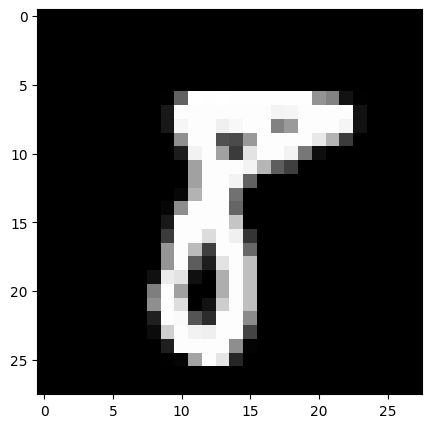

8


In [58]:
plt.figure(figsize = (20, 5))
grid_data = np.array(df.iloc[ind]).reshape(28, 28)
plt.imshow(grid_data, interpolation= None, cmap = "gray")
plt.show()
print(label[ind])


# Standardize the dataset

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df)
df.shape

(42000, 784)

* Find the Co-Variance matrix which is AT * A using NumPy matmul method after multiplication.
* The dimensions of our Co-Variance matrix is 784 * 784 because AT(784 * 20000) * A(20000 * 784).

In [60]:
covar_mat = np.matmul(df.T, df)
covar_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# FInding top two Eigen values and corresponding eigen vectors for projecting onto a 2D surface. 

In [61]:
from scipy.linalg import eigh
values, vectors = eigh(covar_mat, eigvals = (782, 783)) 
print(f"Dimensions of Eigen Vector:", vectors.shape)
vectors = vectors.T
print("Dimensions of Eigen vector:", vectors.shape)


Dimensions of Eigen Vector: (784, 2)
Dimensions of Eigen vector: (2, 784)


In [62]:
final_df = np.matmul(vectors, df.T)
print("vectors:", vectors.shape, "n", "std_df:", df.T.shape, "n", "final_df:", final_df.shape)


vectors: (2, 784) n std_df: (784, 42000) n final_df: (2, 42000)


In [64]:
final_dfT = np.vstack((final_df, label)).T
dataFrame = pd.DataFrame(final_dfT, columns = ['pca_1', 'pca_2', 'label'])
dataFrame

,pca_1,pca_2,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0
...,...,...,...
41995,-1.350366,13.678849,0.0
41996,-1.187360,-8.869582,1.0
41997,7.076277,0.495391,7.0
41998,-4.344513,2.307240,6.0


In [75]:
sns.FacetGrid(dataFrame, size = 8).map(sns.scatterplot, 'pca_1', 'pca_2').add_legend()

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'